<a href="https://colab.research.google.com/github/bmjaron/phase_2_final_project/blob/main/regression_final_project_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

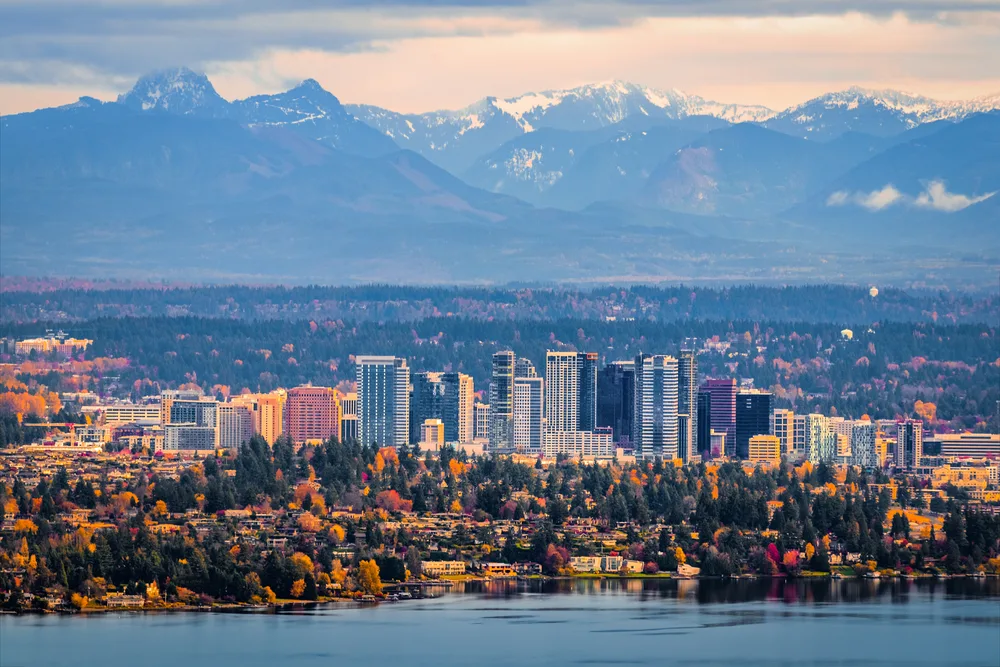

# Business Problem

Our client is a real estate firm that purchases homes in King County (Washington State) with the aim of remodelling and reselling for a profit. They have presented us with data collected from house sales in King County, and have asked us to build a predictive model to help them purchase homes at a discount, and to eventually ensure that they resell them at the right price.

# Data Understanding

The data we'll be analyzing is from house sales in King County, which is located in Washington State.

Below we'll load the data into our notebook.

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight') #Setting style for all visualizations in the notebook

In [2]:
#Note that we're loading a link to the raw data as opposed to a file
df = pd.read_csv("https://raw.githubusercontent.com/bmjaron/phase_2_final_project/main/data/kc_house_data.csv")

In order to understand our data we'll run ```df.shape``` and ```df.describe()```.

In [3]:
df.shape

(30155, 25)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Our data contains 25 columns and 30,155 entries. Looking at the results from ```df.describe()```, which tells us summary statistics of our numerics, we see that the median sale price of a home is $860,000. Other useful information emerges, like that the normal home has 3 bedrooms, 2.5 bathrooms and 1,920 square feet. The median year that a house was built was in 1977.

We can't see all of our columns because ```df.describe()``` returns just numerics, so below we'll look at all of the columns to get a broader picture of our data.

In [5]:
#Run df.columns to show all columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

Luckily, these columns are mostly intuitive. The price, bedrooms, square feet of living space, and other columns contain exactly that information.

The description of all of the column names is in a file in our repository. In order to make future analyses simpler, we'll expand on some of the more obscure column names here:

* Green belt: Whether the house is adjacent to a green belt
* Nuissance: Whether the house has traffic noise or other recorded nuisances
* View: quality of the view of the house, especially as there are many lakes and bodies of water.
* Conidition: the overall condition of the house especially as it pertains to maintenance
* Grade: the overall grade of the house that is calculated based on the quality of construction. This is determined based on the quality of materials used and quality of worksmanship (higher quality materials/worksmanship means it cost more to build).

In addition, we're going to run ```value_counts()``` on ```sewer_system``` and ```heat_source``` to get an idea of the different categories.








In [6]:
#Show different types of heat sources
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [7]:
#Show different types of sewer systems
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

# Data Preparation

Our data set is pretty sizeable, and most columns have no null values, and those that do have very few entries. The null values will inhibit our ability to run regression analyses. To address this, I'm going to drop rows with null values.

In [8]:
#Drop rows with null values
df = df.dropna(axis=0)

#Show data frame after dropping null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

# Setting a Baseline Model

Our goal is to build a regression model that can most closely predict the price of a home. There are a few characteristics that will determine what's best, including R-squared (how much of the total variance in house price does our model capture), and whether or not our model and its variables are statistically significant.

Below we're going to run a simple linear regression as a baseline. The success of any subsequent model is going to be judged by how much it improves the baseline.

The standard practice for building the appropriate baseline is by using the variable most positively correlated with price as the predictor. This will be accomplished with the code below.

In [9]:
#Running .corr() to return data frame sorted by correlation with price, with price dropped as it has perfect correlation with itself
df.corr("pearson")[['price']].drop('price').sort_values(by='price', ascending=False)

<ipython-input-9-5f685440e257>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr("pearson")[['price']].drop('price').sort_values(by='price', ascending=False)


,price
sqft_living,0.608616
sqft_above,0.538631
bathrooms,0.480337
sqft_patio,0.313789
bedrooms,0.288954
sqft_garage,0.263674
sqft_basement,0.245005
floors,0.180589
yr_built,0.095796
sqft_lot,0.086550


Square feet of living space is most positively correlated with price. We'll use that as the baseline when we run the regression below.

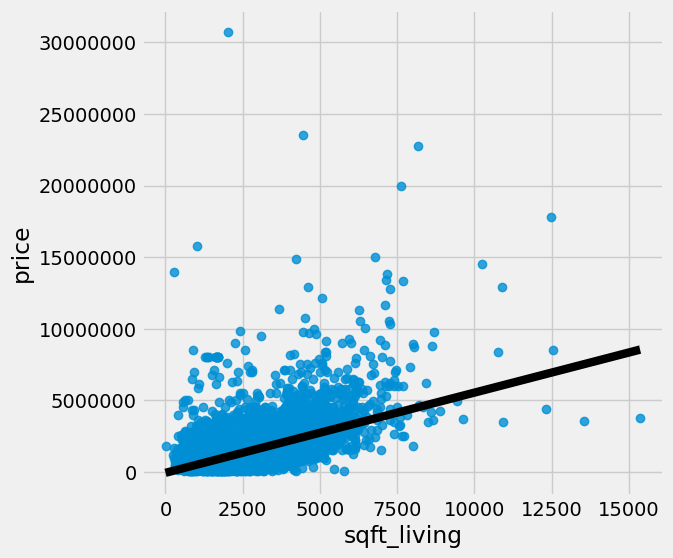

In [10]:
y = df['price'] #Setting the y-value of price. This will be used throughout the rest of the notebook
x_baseline = df[['sqft_living']] #Making a data frame out of just 'sqft_living' alone

#Standard practice is to add a constant for the intercept
results = sm.OLS(endog=y, exog=sm.add_constant(x_baseline)).fit() #Run statsmodels regression model with above variables

results.summary()

fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(x=x_baseline, y=y, line_kws={"color": "black"}) #Plotting the linear regression using Seaborn
plt.ticklabel_format(style='plain') #Preventing scientific notation for easy readability


Our baseline model has a R-squared value of 0.370, which means that our model explains roughly 37% of the total variance of house prices.

Additionally, our model is statistically significant and the coefficients are statistically significant, as demonstrated by the p-value of the F-statistic and the p-values of the variables being equal to 0.

The interpretation of our model is the following: a theoretical house with no square feet of living will have a price of -$75,990, while every subsequent square foot added will yield a price increase of 560 dollars.

This interpretation seems to defy logic. How could it be that a property without any square feet has a negative price? At worst it should be 0, but parcels of empty land have value. Additionally, as our task is to help our client predict house prices, the fact that our baseline captures 37% of variance is underwhelming. There's a very high chance that the true house price will vary significantly from our equation's prediction.

In order to adress this, we're going to rebuild the baseline, this time without an intercept. This will give our model a more realistic description, and hopefully improve our R-squared.

In [11]:
#Run baseline model without constant
baseline_v2_results = sm.OLS(y, x_baseline).fit() #In order to strip constant we just run with x_baseline, and take out sm.add_constant()
baseline_v2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                          9.066e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:12:10   Log-Likelihood:                     -4.4850e+05
No. Observations:               30111   AIC:                                  8.970e+05
Df Residuals:                   30110   BIC:                                  8.970e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   531.0074      1.764    301.092      0.000     527.551     534.464
==============================================================================
Omnibus:                    43796.648   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48091283.205
Skew:                           8.357   Prob(JB):                         0.00
Kurtosis:                     198.069   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of the F-statistic and of the variables are 0, which means that our model is satistically significant and so is our predictor.

Our R-squared is 0.751, which means that our model explains roughly 75% of the total variance of house price.

The interpretation of our model is the following: a house with 0 square feet will have a sale price of 0, while every square foot added will yield a price increase of $531.

# Adding Multiple Variables

In an attempt to better our model, we're going to start to introduce some other variable. We'll start with numeric variables. Something we want to be careful of is multicolinearty, the concern that our variables are highly correlated with each other. The basic concern is the following: as we introduce more variables, we interpret each coefficient as the change in a certain feature while holding all else constant. If variables move together, this becomes harder to do.

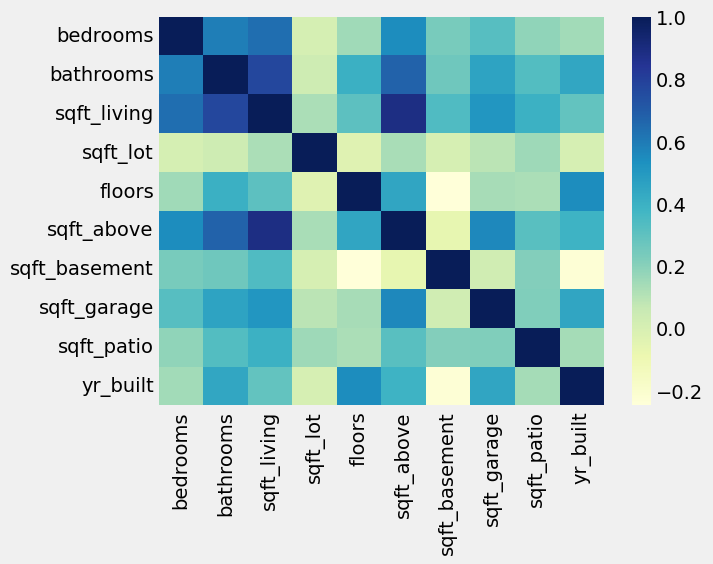

In [12]:
#Use df.select_types() to drop all non-numeric items, then use .drop() to get rid of irrelevant columns
df_numerics = df.select_dtypes(exclude='object').drop(['id', 'price', 'yr_renovated', 'lat', 'long'], axis=1)

#Use heatmap to visualize correlations
sns.heatmap(df_numerics.corr(), cmap='YlGnBu');

As we can see from our code above, the two most highly correlated values with sqft_living are sqft_above and bathrooms. Additionally, sqft_living includes any square feet in the basement, which explains the high positive correlation between sqft_basement and sqft_living.

Below, we'll remove these.

In [13]:
#Drop highly correlated columns
df_numerics = df_numerics.drop(['bathrooms', 'sqft_above', 'sqft_basement'], axis=1)

In order to get a better feel for how these variables relate to price, we're going to show scatter plots of each variable with price.

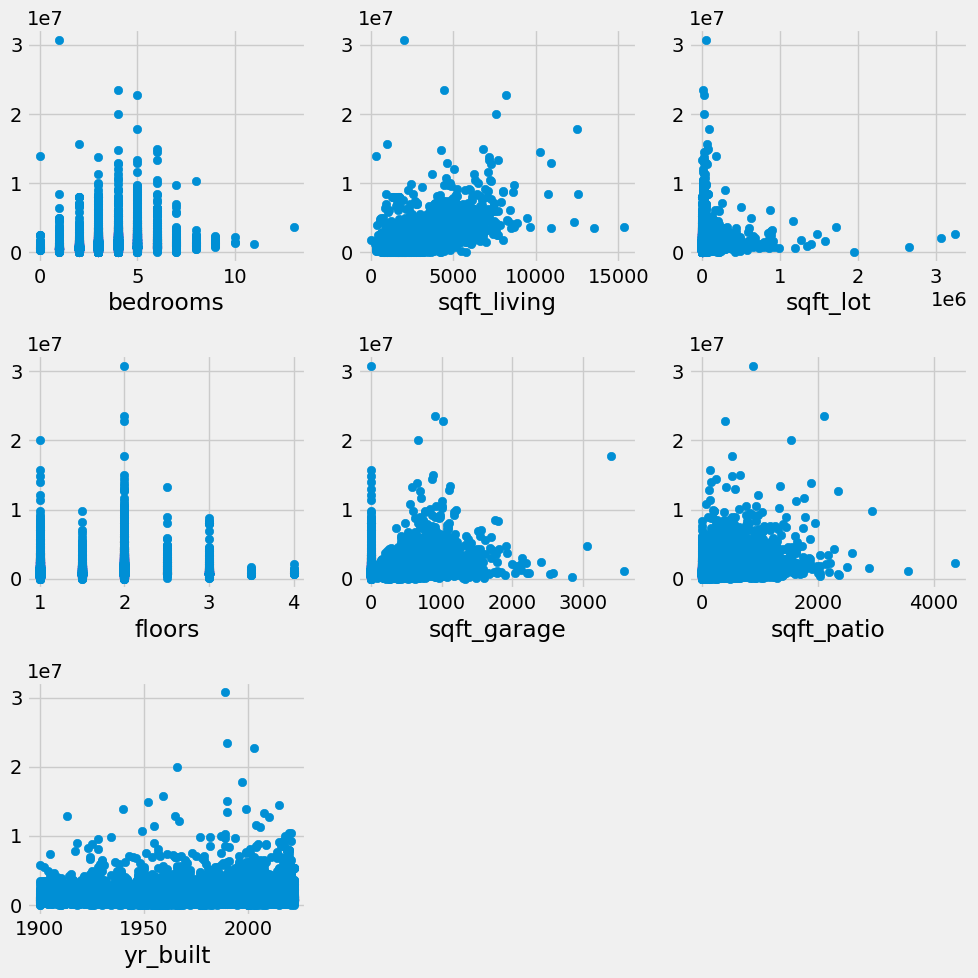

In [14]:
#Plot axes
fig, axes = plt.subplots(3, 3, figsize=(10,10))

#Loop through the dataframe's columns and plot scatterplots
for n, x in enumerate(list(df_numerics.columns)):
  if n < 3:
    axes[0][n].scatter(y=y, x=df[x])
    axes[0][n].set_xlabel(x)
  elif n >= 3 and n<6:
    axes[1][n-3].scatter(y=y, x=df[x])
    axes[1][n-3].set_xlabel(x)
  else:
    axes[2][0].scatter(y=y, x=df[x])
    axes[2][0].set_xlabel(x)

#Since we have an odd number, we'll delete the unnecessary plots manually
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.tight_layout()


Now, with those visuals in mind. We'll run a multiple regression to see the results.

In [15]:
#Run first multiple regression model
multiple_results = sm.OLS(y, df_numerics).fit()

#Show results
multiple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                          1.366e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:12:12   Log-Likelihood:                     -4.4789e+05
No. Observations:               30111   AIC:                                  8.958e+05
Df Residuals:                   30104   BIC:                                  8.958e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -1.429e+05   5374.666    -26.587      0.000   -1.53e+05   -1.32e+05
sqft_living   663.0964      6.510    101.858      0.000     650.337     675.856
sqft_lot       -0.0920      0.069     -1.342      0.180      -0.226       0.042
floors      -2.402e+04   7618.206     -3.153      0.002    -3.9e+04   -9087.266
sqft_garage  -216.4247     16.408    -13.190      0.000    -248.586    -184.263
sqft_patio    274.4796     18.053     15.204      0.000     239.095     309.864
yr_built      124.1005      9.087     13.657      0.000     106.290     141.911
==============================================================================
Omnibus:                    42787.188   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45740991.442
Skew:                           7.965   Prob(JB):                         0.00
Kurtosis:                     193.274   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although the model definitely improved, as R-squared rose to 0.761, and the model is statistically significant, the predictor sqft_lot is not statistically significant. This can be seen by the p-value of 0.180, which is above our threshold of 0.05. Before we proceed to interpret the model, we're going to run a different model that drops sqft_lot from predictors.


In [16]:
#Same model with sqft_lot dropped from dataframe
multiple_v2_results = sm.OLS(y, df_numerics.drop('sqft_lot', axis=1)).fit()
multiple_v2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                          1.594e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:12:12   Log-Likelihood:                     -4.4789e+05
No. Observations:               30111   AIC:                                  8.958e+05
Df Residuals:                   30105   BIC:                                  8.958e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -1.423e+05   5354.206    -26.571      0.000   -1.53e+05   -1.32e+05
sqft_living   662.2047      6.476    102.254      0.000     649.511     674.898
floors       -2.32e+04   7593.948     -3.055      0.002   -3.81e+04   -8317.738
sqft_garage  -216.9586     16.404    -13.226      0.000    -249.111    -184.806
sqft_patio    271.8599     17.947     15.148      0.000     236.682     307.037
yr_built      122.9298      9.045     13.591      0.000     105.202     140.658
==============================================================================
Omnibus:                    42784.165   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45743037.617
Skew:                           7.964   Prob(JB):                         0.00
Kurtosis:                     193.278   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above model is showing the same R-squared as before, except that this time both the model as a whole and all of its predictors are statistically significant (the p-value of the F-statistic and the p-value of all predictors are 0).

The interpretation of our model is the following: a home with no attributes has a price of 0. Each bedroom added holding all else constant **decreases** the price by 142,300 dollars (more on why this relationship is negative, later). Each square foot of living room added holding all else constant **raises** the price by 662 dollars. Each floor added holding all else constant **decreases** the price by 23,200 dollars. Each square foot of garage added holding all else constant **decreases** the price by about 217 dollars. Each square foot of patio added holding all else constant **increases** the price by 272 dollars. And, finally, each year built added holding all else constant **increases** the price by about 123 dollars.

# Adding Categorical Variables

In order to try improving our results, we're going to incorporate our categorical variables.

Let's take a closer look at them below.

In [17]:
df.select_dtypes(include='object').columns

Index(['date', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'address'],
      dtype='object')

In order to simplify things, we're going to exlclude the sale data and address from our analysis. We're then going to look at some bar plots of the values in order to look at frequencies. I'm also going to show plots that sort each category by mean price, just to get a sense of how the feature affects price.

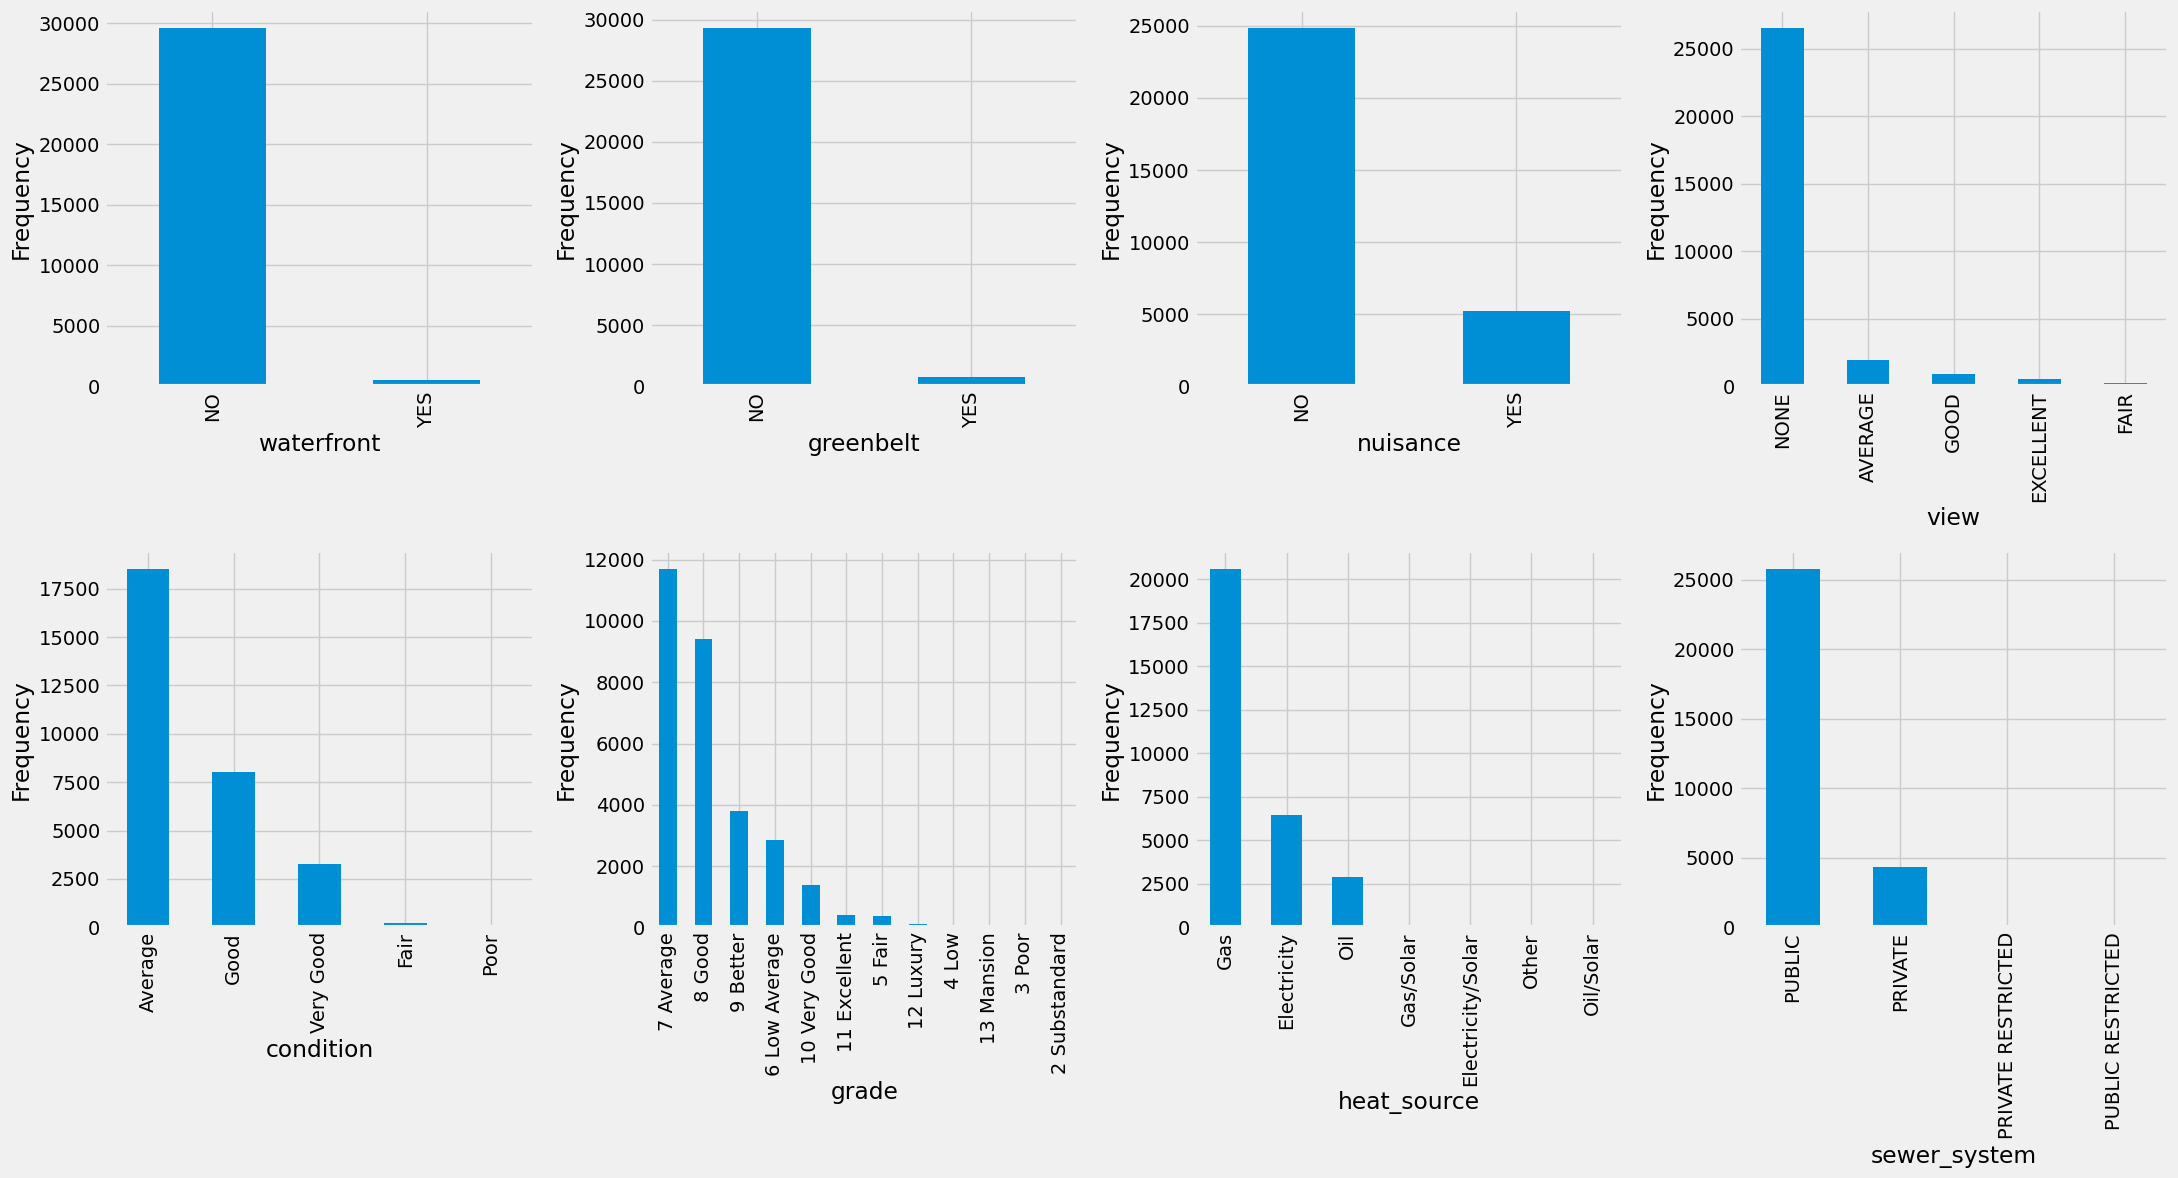

In [18]:
df = df.drop(['date', 'address'], axis=1) #Drop unnecessary columns

#Build histograms

fig, axes = plt.subplots(2, 4, figsize=(22, 12))

#Loop through columns in our dataframes and draw bar plot of frequencies
for n, x in enumerate(list(df.select_dtypes(include='object'))):
  if n < 4:
    df[x].value_counts().plot.bar(ax=axes[0][n], xlabel=x, ylabel='Frequency')
  elif n >= 4:
    df[x].value_counts().plot.bar(ax=axes[1][n-4], xlabel=x, ylabel='Frequency')

plt.tight_layout()

<ipython-input-19-d030d239dc4d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(x).mean().plot.bar(y='price', ax=axes[0][n], ylabel='Mean Price'); #Group the given series by mean price and then draw bar plot
<ipython-input-19-d030d239dc4d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(x).mean().plot.bar(y='price', ax=axes[0][n], ylabel='Mean Price'); #Group the given series by mean price and then draw bar plot
<ipython-input-19-d030d239dc4d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to 

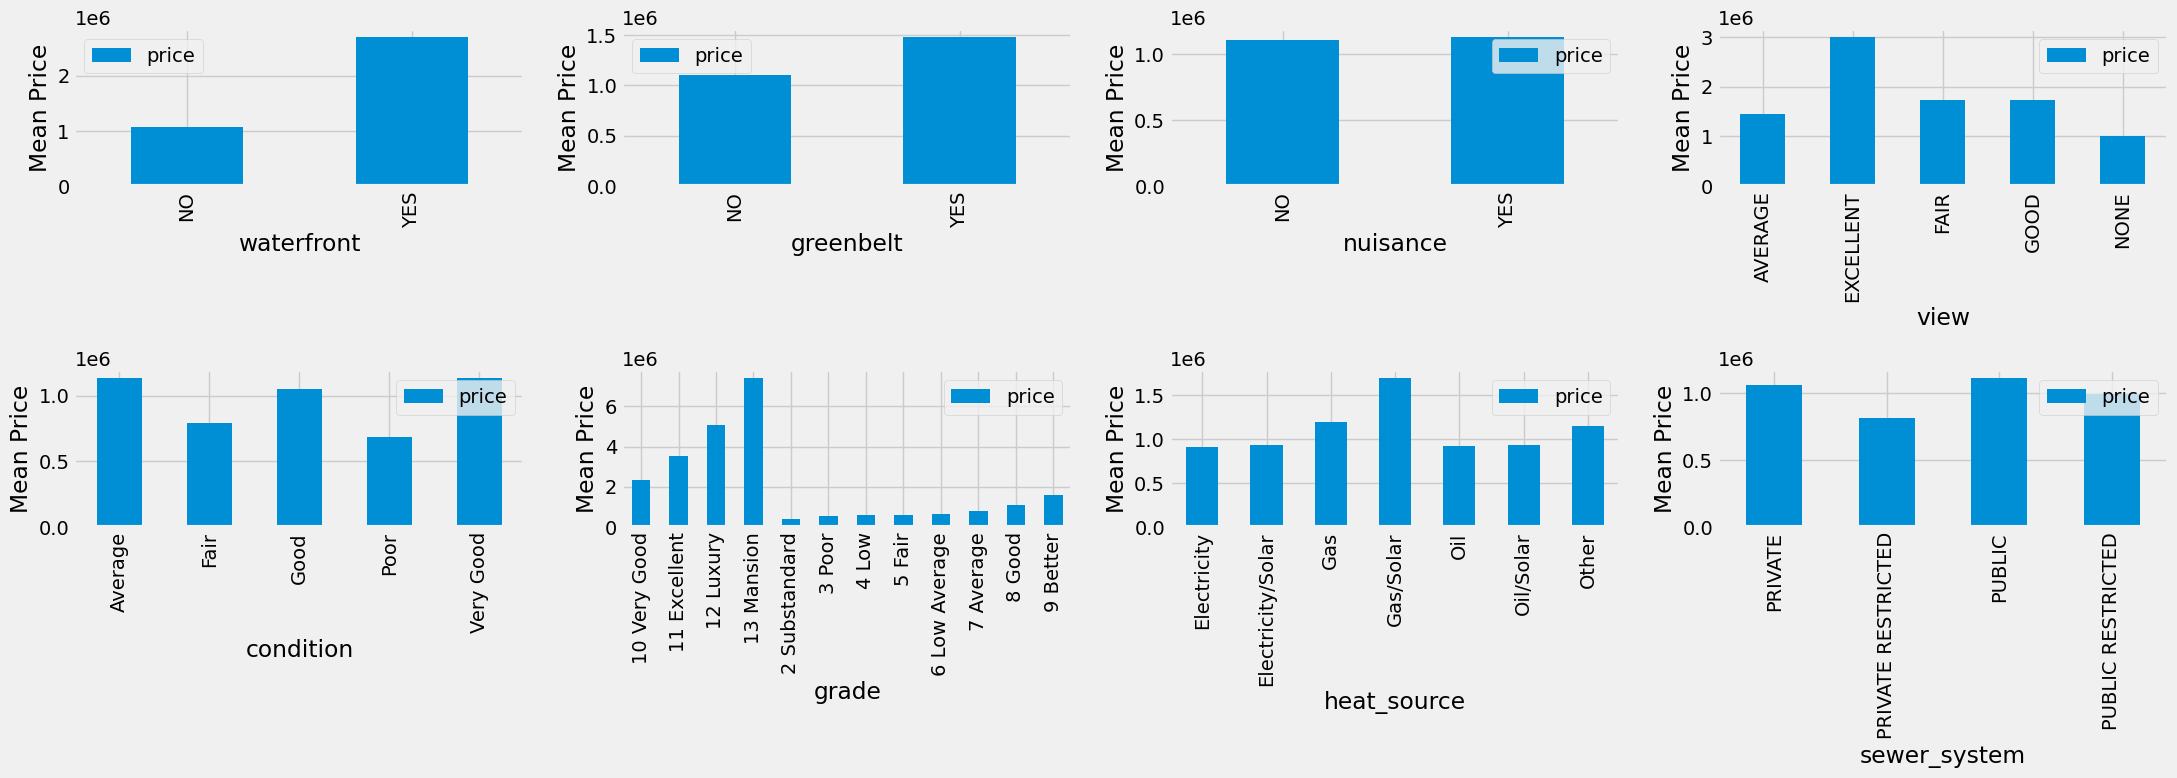

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(22, 8))

#Loop through columns in data frame and plot bar plot with categories and mean
for n, x in enumerate(list(df.select_dtypes(include='object'))):
  if n < 4:
    df.groupby(x).mean().plot.bar(y='price', ax=axes[0][n], ylabel='Mean Price'); #Group the given series by mean price and then draw bar plot
  elif n >= 4:
    df.groupby(x).mean().plot.bar(y='price', ax=axes[1][n-4], ylabel='Mean Price');

plt.tight_layout();

As we can see above, not every categorical variable seems to have price fluctations associated with the different categories. For example, condition, nuissance, sewer_system and heat_source do not seem to have changes in price across the different categories. We'll ignore these columns for now.

The only categorical variables that seem worth analyzing are waterfront, greenbelt, grade and view. Looking at the histogram plots above, there seems to be a problem with greenbelt and waterfront. The frequency of those properties adjacent to a greenbelt or on a water front is so low. Adding a binary variable that will usually not be used to make a predicition seems like it won't be practical or add any value to our model.

As a result we're going to add only grade and view.

In order to account for the lopsided frequencies, we're actually going to bin some of the values and then use ordinal encoding. This means we're going to swap out words for numbers. For views, we're going to make 2 bins and convert to binary number; 1 is going to represent having a view, and 0 is going to represent no view. In addition, I'm going to create 4 bins for grade: anything below 7 will be considered below average and labeled 1, '7 Average' will be 2, '8 Good' will be 3, and anything above that will be labeled 4.



Let's try grouping the columns into smaller subsets.

In [20]:
#Create a copy so that we can freely drop columns
df_copy_1 = df.copy()

#Drop all of the irrelvant columns
df_copy_1 = df_copy_1.drop(['waterfront', 'greenbelt', 'condition', 'nuisance', 'sewer_system', 'heat_source'], axis=1)

In [21]:
#Use lambda function to divide the categorical variables into 4 numeric subsets
df_copy_1['grade'] = df_copy_1['grade'].map(lambda x: 4 if x == '12 Luxury' or
                                                       x == '13 Mansion' or
                                                       x == '10 Very Good' or
                                                       x == '11 Excellent' or
                                                       x == '9 Better' else
                                                     (3 if x == '8 Good' else
                                                     (2 if x == '7 Average' else 1)))

#Show frequencies of new categories
df_copy_1['grade'].value_counts()

2    11693
3     9400
4     5725
1     3293
Name: grade, dtype: int64

In [22]:
#Use lambda function to assign binary values to 'view'
df_copy_1['view'] = df_copy_1['view'].map(lambda x: 0 if x == 'NONE' else 1)
df_copy_1['view'].value_counts()

0    26555
1     3556
Name: view, dtype: int64

Below we'll show the frequency distributions and mean home price for each category of our 2 categorical variables.

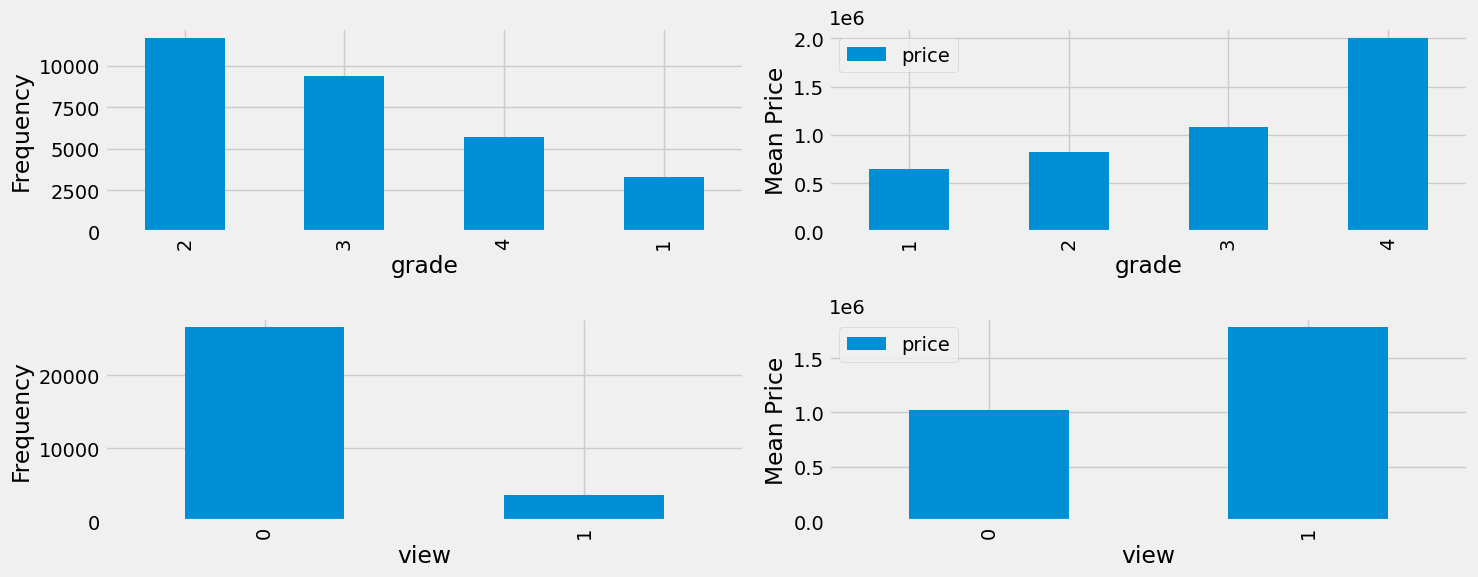

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

to_plot = ['grade', 'view']

for n, x in enumerate(to_plot):
  df_copy_1[x].value_counts().plot.bar(ax=axes[n][0], xlabel=x, ylabel='Frequency')
  df_copy_1.groupby(x).mean().plot.bar(y='price', ax=axes[n][1], xlabel=x, ylabel='Mean Price')

plt.tight_layout()

Now that we have that cleaned up, let's run a multiple regression. To begin, we'll recall the numerics we used for the previous multiple regression model.

In [24]:
list(df_numerics.columns)

['bedrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_garage',
 'sqft_patio',
 'yr_built']

We'll make a new data frame with the predictors above, and our transformed categorical variables.

In [25]:
#Isolate relevant columns
multiple_v3_predictors = df_copy_1[['bedrooms', 'sqft_living', 'floors', 'sqft_garage',
                                    'sqft_patio', 'yr_built', 'grade', 'view']]

#Run regression
multiple_v3_results = sm.OLS(y, multiple_v3_predictors).fit()

#Show results
multiple_v3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                          1.255e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:12:15   Log-Likelihood:                     -4.4732e+05
No. Observations:               30111   AIC:                                  8.947e+05
Df Residuals:                   30103   BIC:                                  8.947e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -1.193e+05   5299.388    -22.511      0.000    -1.3e+05   -1.09e+05
sqft_living   561.5512      7.086     79.253      0.000     547.663     575.439
floors      -8.364e+04   8252.995    -10.134      0.000   -9.98e+04   -6.75e+04
sqft_garage  -258.3806     16.696    -15.476      0.000    -291.105    -225.656
sqft_patio    174.7106     17.860      9.782      0.000     139.704     209.717
yr_built       43.7567      9.292      4.709      0.000      25.544      61.970
grade        1.481e+05   6488.979     22.830      0.000    1.35e+05    1.61e+05
view         3.046e+05    1.3e+04     23.510      0.000    2.79e+05     3.3e+05
==============================================================================
Omnibus:                    43725.655   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50872955.441
Skew:                           8.303   Prob(JB):                         0.00
Kurtosis:                     203.680   Cond. No.                     9.97e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is statistically significant, as are all of the predictors (both the p-value of the F-statistic and the p-values of all predictors are 0).

Our new adjusted R-squared is 0.769. Unfortunately, this is only a 0.8% improvement over the previous model adjusted R-squared of 0.761.

The interpretation of our model is as follows: a theoretical house with no attributes has a price of 0. Each bedroom added (holding all else constant) will **decrease** the price by 119,300 dollars. Each square foot of living space added (holding all else constant) will **increase** price by 561 dollars. Each floor added to the home (holding all else constant) will **decrease** the price by 83,640 dollars. Each square foot of garage space added (holding all else constant) will **decrease** the price by 258 dollars. Each square foot of patio space (holding all else constant) will **increase** the price by 174 dollars. Each newer year built (holding all else constant) will **increase** the price by 47 dollars. Each subsequent grade added (holding all else constant) will **increase** the price by 148,100 dollars. And, finally, the presence of a view (holding all else constant) will **increase** price by 304,600 dollars.

# Polynomial Model Evaluation

If we recall from the scatter plots above, some of the numeric features had some curvature. One of these features, sqft_living, is in our model. Let's show the scatter plot again, below.

Text(0, 0.5, 'Price')

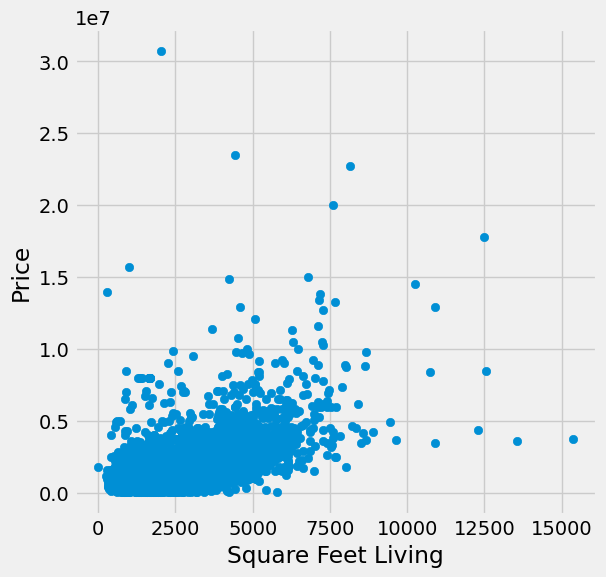

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y=y, x=df['sqft_living'])
ax.set_xlabel('Square Feet Living')
ax.set_ylabel('Price')

In order to account for this we're going to add an exponential variable to our model, and then run a new regression.

In [27]:
multiple_v4_predictors = multiple_v3_predictors.copy()

#Adding new column that will be the exponential term by squaring
multiple_v4_predictors['sqft_living_squared'] = multiple_v4_predictors['sqft_living']**2

multiple_v4_results = sm.OLS(y, multiple_v4_predictors).fit()

#Let's look at just R-squared to see if it's an improvement
multiple_v4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                          1.183e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:12:15   Log-Likelihood:                     -4.4665e+05
No. Observations:               30111   AIC:                                  8.933e+05
Df Residuals:                   30102   BIC:                                  8.934e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms             -6.03e+04   5418.485    -11.129      0.000   -7.09e+04   -4.97e+04
sqft_living           101.9018     14.158      7.197      0.000      74.151     129.653
floors              -8.958e+04   8071.060    -11.099      0.000   -1.05e+05   -7.38e+04
sqft_garage          -242.2918     16.330    -14.837      0.000    -274.300    -210.284
sqft_patio            169.3756     17.463      9.699      0.000     135.146     203.605
yr_built              177.1665      9.767     18.140      0.000     158.023     196.310
grade                2.071e+05   6539.577     31.673      0.000    1.94e+05     2.2e+05
view                 3.134e+05   1.27e+04     24.731      0.000    2.89e+05    3.38e+05
sqft_living_squared     0.0661      0.002     37.226      0.000       0.063       0.070
==============================================================================
Omnibus:                    42249.324   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58463558.929
Skew:                           7.652   Prob(JB):                         0.00
Kurtosis:                     218.323   Cond. No.                     2.70e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Running Goldfeldt-Quandt test to check for model homoscedasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt

#Print the p-value only
het_goldfeldquandt(y, multiple_v4_predictors)[1]

0.9999999999999999

The adjusted R-squared of our model is 0.779, meaning that our model captures about 78% of the variance of house price. This is certainly an improvement from our baseline, and even some of the other multiple regressions we ran.

Our model is also statistically significant, and all of our coefficients are statistically significant.

Before we explain what our model is *saying*, let's first check some of our assumptions of linearity.

1.  **Multicolinearity:** This should not be a problem for us, as we took out variables with correlation earlier.
2. **Normality:** Looking at the p-value of the Jarque-Bera test, which checks for residual normality, we can see a value of 0. This means that we can reject the null hypothesis that our model residuals are not normal in favor of the alternative hypothesis that our model residuals are normal. In short, we've met the normality assumption with statistical significance.
3. **Homoscedasticity:** A look above at the Goldfeld-Quandt test we ran shows a p-value of 0.99, which means we fail to reject the null hypothesis, and conclude that our data is homoscedastic.

One of the most important assumptions that we have not checked for is linearity. Below, we'll try to determine this in a few ways. We're going to run a visual check by plotting residuals and partial regression plots. We're also going to run the linear rainbow test. The null hypothesis test is that the model is linear. If we have a p-value that is less than 0.05, we're going to reject the null hypothesis in favor of the alternative hypothesis and conclude that the model is **not** linear.

We'll begin by plotting model residuals.

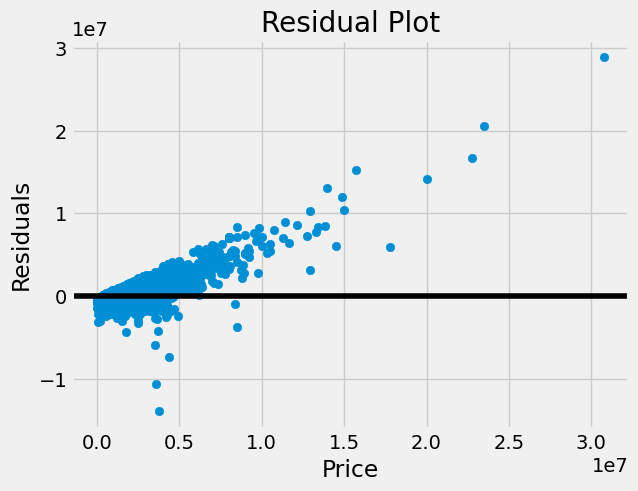

In [30]:
#Plot model residuals
fig, ax = plt.subplots()

ax.scatter(y, multiple_v4_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Price")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot");

It looks like there is some curvature in the residuals.

Below, we'll also check out the partial regression plots.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


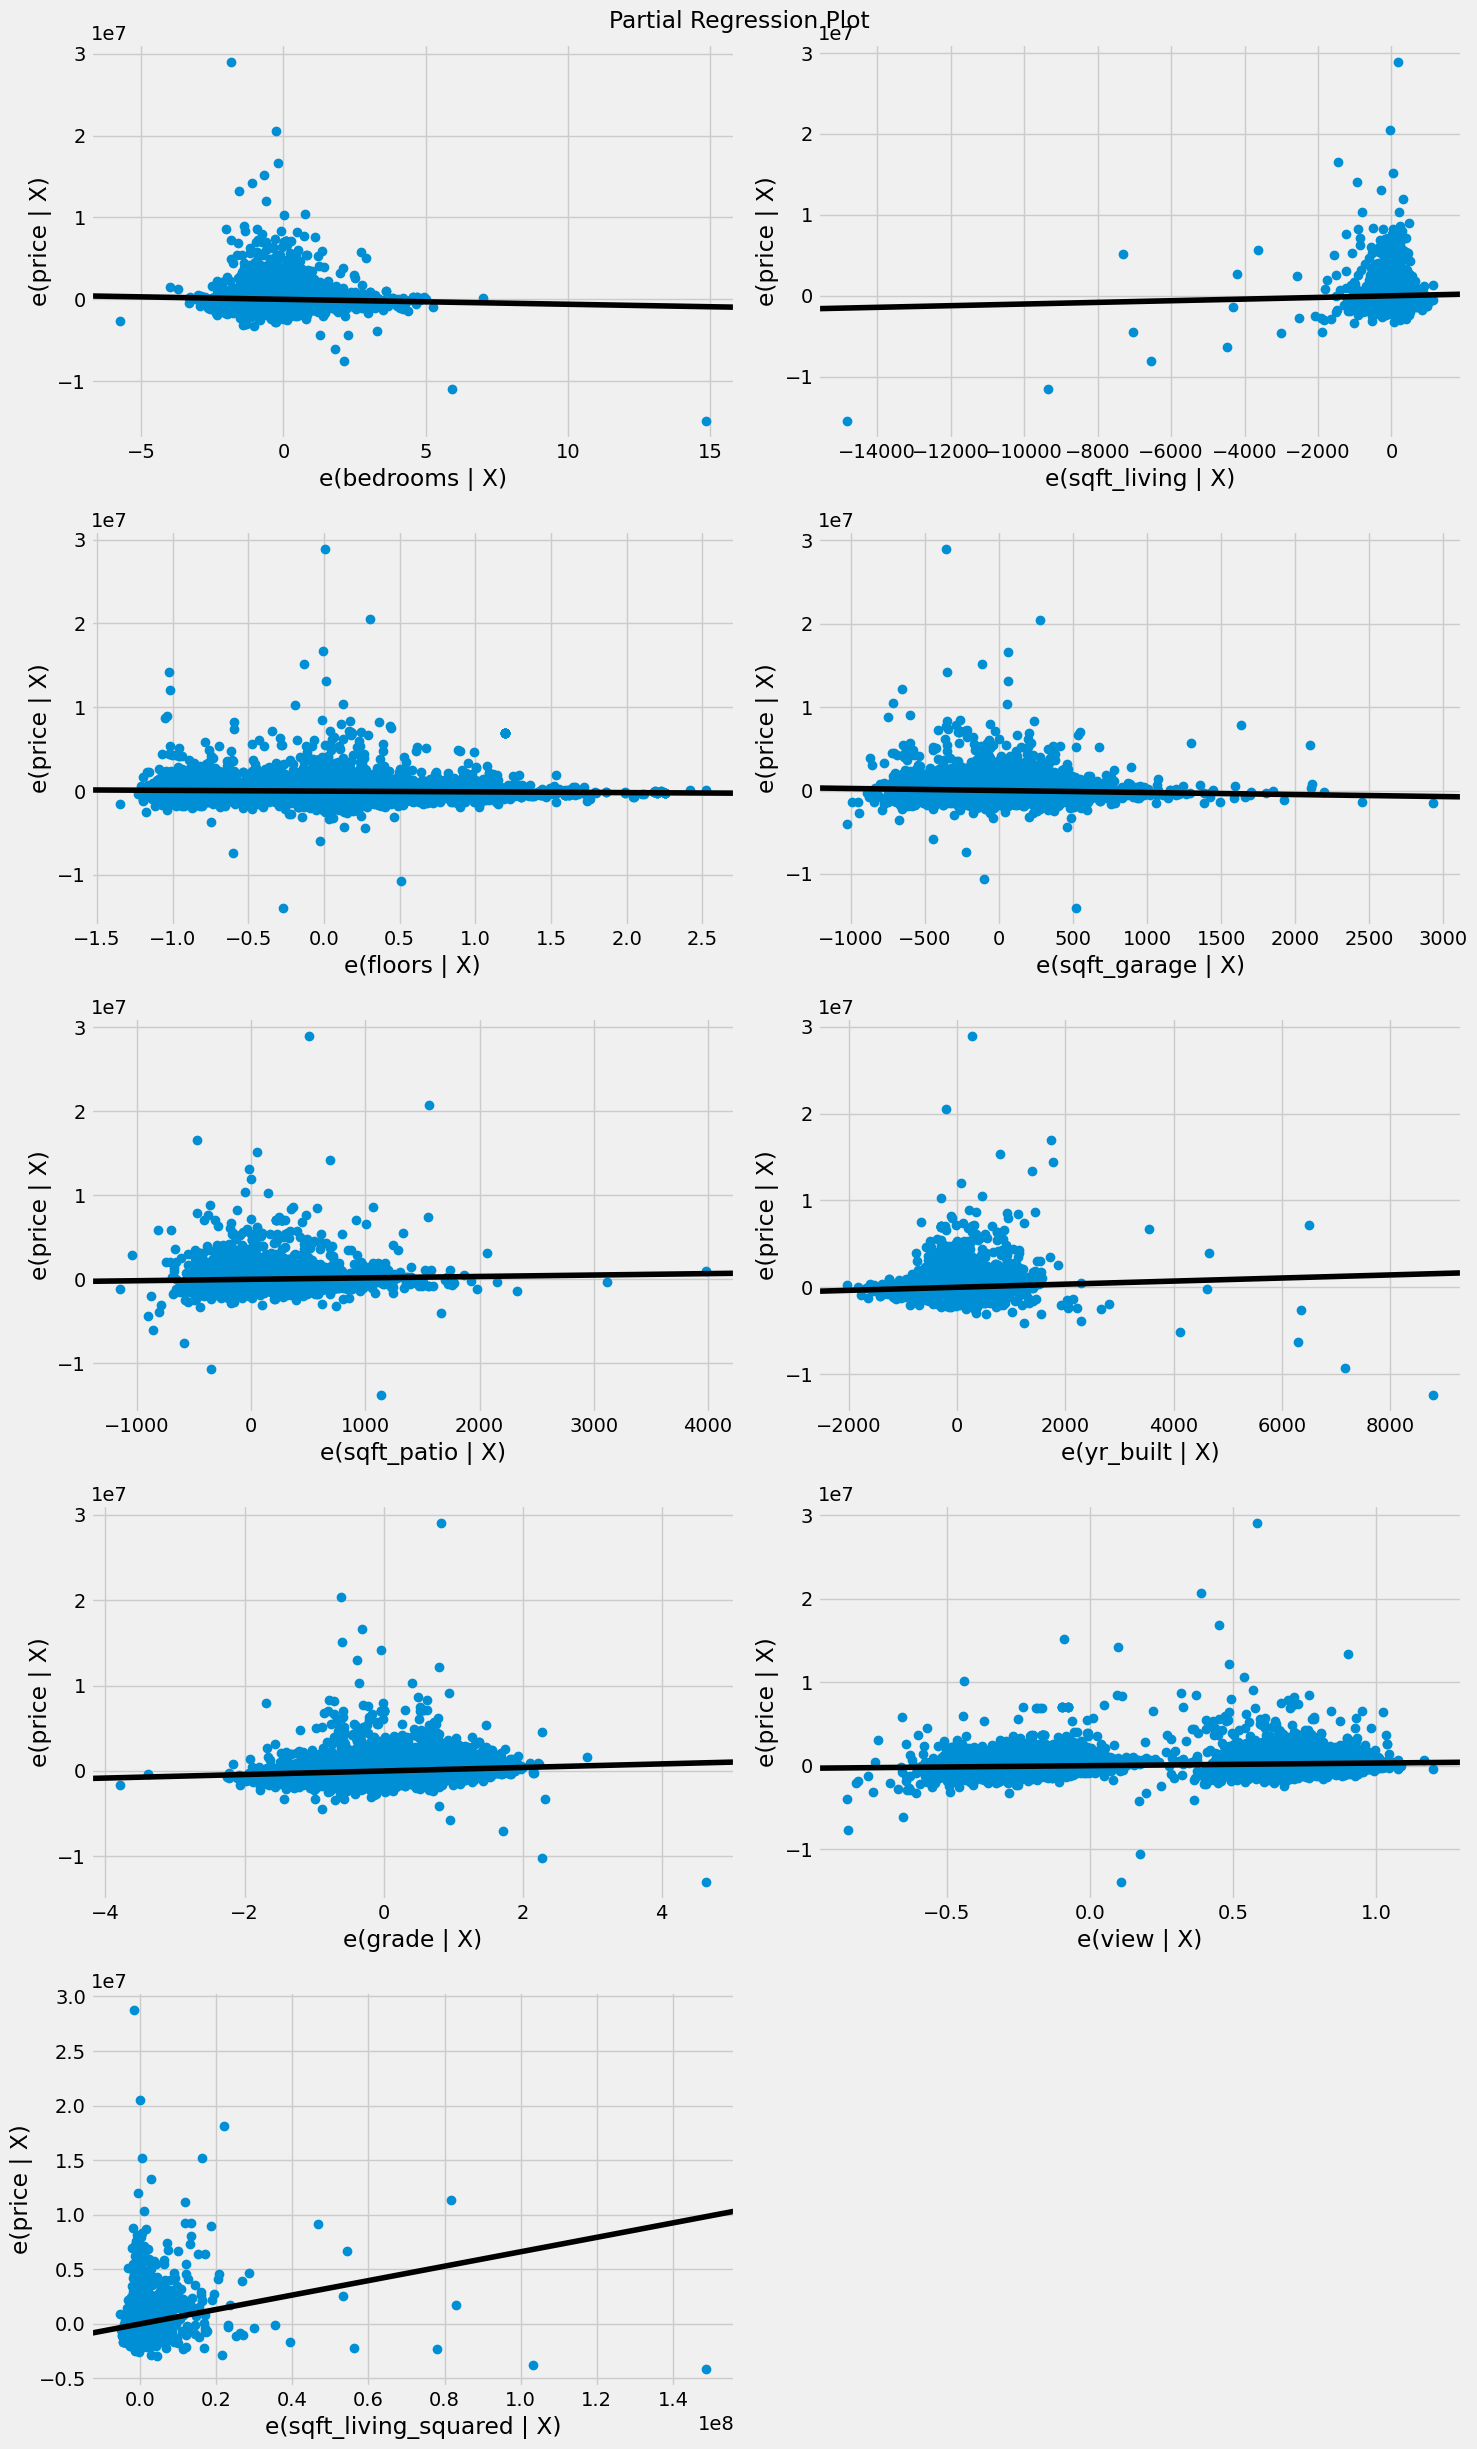

In [46]:
fig = plt.figure(figsize=(15,25))
sm.graphics.plot_partregress_grid(multiple_v4_results, exog_idx=['bedrooms', 'sqft_living', 'floors', 'sqft_garage',
                                    'sqft_patio', 'yr_built', 'grade', 'view', 'sqft_living_squared'], fig=fig);

plt.tight_layout();

The partial regression plot is supposed to depict whether or not the predictor has a linear relationship with the target, holding all else equal. It seems that in our model, none of the predictors have a particularly linear relationship. Below, we'll try to confirm this with a statistical test.

In [47]:
#Running a rainbow test to check for model linearity
from statsmodels.stats.diagnostic import linear_rainbow

#Return p-value only
linear_rainbow(multiple_v4_results)[1]

1.585593681904302e-11

The incredibly low p-value means that we must reject the null hypothesis (that the model is linear), in favor of the alternative hypothesis that the model is not linear.

But this isn't unique to our polynomial model, all models that we ran above are not linear, as we'll show below.

In [31]:
#List of all models
result_list = [results, baseline_v2_results, multiple_results, multiple_v2_results, multiple_v4_results]

#Loop through list of models and print the p-value for rainbow test
for r in result_list:
  print(linear_rainbow(r)[1])

1.1486784795057495e-11
1.273502728522834e-11
3.5731764771270066e-11
3.6925916627345955e-11
1.585593681904302e-11


With the understanding of our assumptions of linearity in mind, we'll move on to model interpretation.


**Interpreation of Model:** A house with no features will have a price of 0 dollars.

*  For every bedroom added, holding all else constant, price decreases by 60,300 dollars.
*   For every square foot of living space added (holding all else constant) price increases by about 103 dollars.
* For every floor added (holding all else constant) price decreases by about 89,598 dollars.
* For every square foot of garage space added (holding all else constant) price decreases by 242 dollars.
* For every square foot of patio space added (holding all else constant) price increases by about 169 dollars.
* For every subsequent year built (holding all else constant) the price increases by about 177 dollars.
* Each time a new range of grades is reach (holding all else constant) price increases by 207,000 dollars.
* And for the presence of a view (holding all else constant) price increases by 313,400 dollars.

More on this, later.

# Logarithmic Transformation

A way to treat non-linear models is to run a logarithmic transformation of the predictors. To remind ourselves, we'll take a look at the dataframe of our predictors below.

In [32]:
multiple_v4_predictors.head()

,bedrooms,sqft_living,floors,sqft_garage,sqft_patio,yr_built,grade,view,sqft_living_squared
0,4,1180,1.0,0,40,1969,2,0,1392400
1,5,2770,1.0,0,240,1950,2,1,7672900
2,6,2880,1.0,0,0,1956,2,1,8294400
3,3,2160,2.0,200,270,2010,4,1,4665600
4,2,1120,2.0,550,30,2012,2,0,1254400


In our code below we're going to take the natural logarithim of the predictors. This means that each entry we'll be transformed to whatever number *e* (about 2.718) must be raised to in order to get that number, or, in other words, if we have 2.718 (*e*) bedrooms, our entry would be converted to 1, as this is the value we must raise *e* to in order to get *e*.

This poses a slight problem considering our dataframe. There are several entries that are equal to 0. Mathematically, the natural logarithim of 0 is undefined, because there's no number that we could raise *e* to in order to have a number that equals 0 (*e* to the 0th power is still 0).

To address this, we're going to have to elimnate the rows with zero. In order to do this, we're going to drop the columns sqft_garage, sqft_patio and view. As these columns have several instances of 0. Additionally, we'll drop sqft_living_squared for model readability.

In [33]:
pre_log_df = multiple_v4_predictors.drop(['sqft_garage', 'sqft_patio', 'view', 'sqft_living_squared'], axis=1)

We'll see from the code below that even 'bedrooms' has some entries of 0. Presumably these are studio apartments. We'll filter these out.

In [34]:
pre_log_df['bedrooms'].value_counts()

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

In [35]:
log_predictors = np.log(pre_log_df[pre_log_df['bedrooms'] > 0])

log_predictors

,bedrooms,sqft_living,floors,yr_built,grade
0,1.386294,7.073270,0.000000,7.585281,0.693147
1,1.609438,7.926603,0.000000,7.575585,0.693147
2,1.791759,7.965546,0.000000,7.578657,0.693147
3,1.098612,7.677864,0.693147,7.605890,1.386294
4,0.693147,7.021084,0.693147,7.606885,0.693147
...,...,...,...,...,...
30150,1.609438,7.554859,0.405465,7.560601,1.098612
30151,1.098612,7.610853,0.693147,7.606387,0.693147
30152,1.098612,7.390181,0.000000,7.598399,0.693147
30153,1.098612,7.851661,0.693147,7.603898,1.098612


Another thing that we're going to have to change is our target. Previously we created a y-variable by isolated price from the original dataframe. The length was 30,111 entries (see code below). Since we've now filtered out homes with 0 bedrooms, the length of our dataframe is now 30,072.

In [36]:
print(f"Length of original y-variable: {len(y)}")

print(f"Length of current, adjusted dataframe: {len(log_predictors)}")

Length of original y-variable: 30111
Length of current, adjusted dataframe: 30072


We're going to have to build a new y-variable that's appropriate for our current dataframe of predictors.

In [37]:
#Make a temporary df that filters out homes with 0 bedrooms
log_y = df[df['bedrooms'] > 0]

#Isolate price from that dataframe to serve as new y-variable
log_y = log_y['price']

Now, we're set to run our regression model.

In [38]:
#Run model
log_reg = sm.OLS(log_y, log_predictors).fit()

#Show results
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                          1.574e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:12:16   Log-Likelihood:                     -4.4943e+05
No. Observations:               30072   AIC:                                  8.989e+05
Df Residuals:                   30067   BIC:                                  8.989e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.805e+05   1.99e+04    -24.089      0.000    -5.2e+05   -4.41e+05
sqft_living  1.142e+06   1.67e+04     68.428      0.000    1.11e+06    1.17e+06
floors      -7.457e+04   1.38e+04     -5.415      0.000   -1.02e+05   -4.76e+04
yr_built    -9.471e+05   1.39e+04    -68.056      0.000   -9.74e+05    -9.2e+05
grade        2.997e+05   1.53e+04     19.563      0.000     2.7e+05     3.3e+05
==============================================================================
Omnibus:                    42751.740   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35851522.261
Skew:                           8.076   Prob(JB):                         0.00
Kurtosis:                     171.379   Cond. No.                         67.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our model is statistically significant and so are all of the predictors, as demonstrated by the p-value of the F-statistic and p-values of all predictors equalling 0.

Additionally, our model has an adjusted R-squared of 0.723. This is a downgrade from our previous model's adjusted R-squared of 0.779. Despite this decrease, this model could still be more attractive than our previous model, becuase the logarithmic transformation may help us achieve more model linearity. We'll check this below by running the linear rainbow test to check for linearity.

The standard method for interpreting a logarithmic model is the following: each 1% increase in the predictors yields an increase in the coefficient/100. As such, we must isolate the coefficients and divide them by 100.

In [39]:
#Make list of coefficients
coefficient_list = [-4.805e+05, 1.142e+06, -7.457e+04, 	-9.471e+05, 2.997e+05]

#Initiate empty list
adjusted_coefficients = []

#Loop thru coefficients, divide by 100 and append to new list
for c in coefficient_list:
  adjusted_coefficients.append(c/100)

#Show adjusted coefficients
adjusted_coefficients

[-4805.0, 11420.0, -745.7, -9471.0, 2997.0]

Now we can make the following interpretation:


*   A home with no features has a price of 0.
*   Every 1% increase of bedrooms will decrease the price by 4,805 dollars.
*   Every 1% increase of sqft_living will increase price by 11,420 dollars.
*   Every 1% increase of floors will decrease price by 745.7 dollars.
*   Every 1% increase of yr_built will decrease price by 9,471 dollars.
*   Every 1% increase of grade will increase price by 2,997 dollars.

We mentioned that we must see how much our model improve linearity in order to consider accepting a model with a lower adjusted R-squared. We'll show this below.

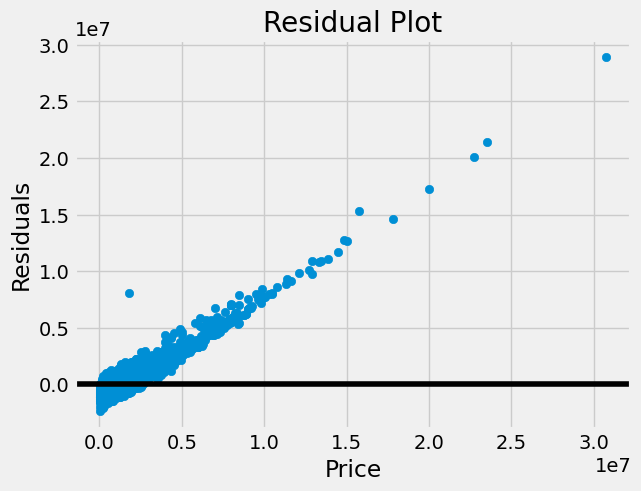

In [49]:
#Plot model residuals
fig, ax = plt.subplots()

ax.scatter(log_y, log_reg.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Price")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot");

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


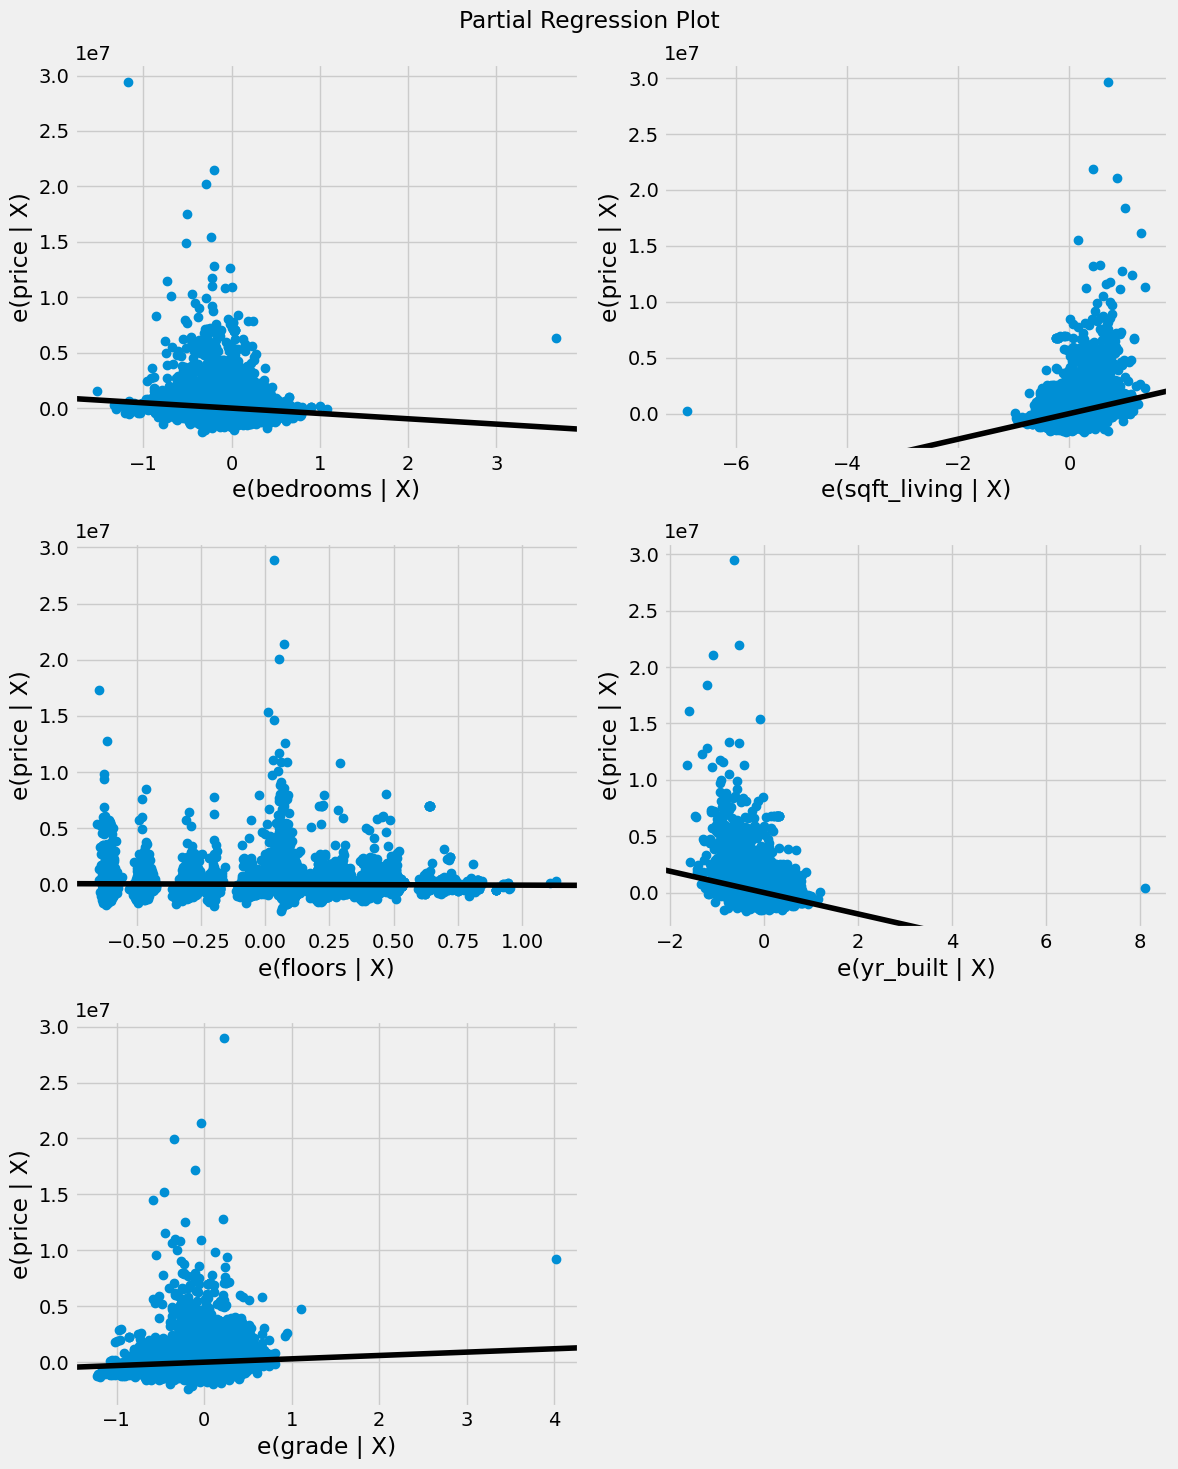

In [51]:
#Plotting partial regression plots
fig = plt.figure(figsize=(12,15))
sm.graphics.plot_partregress_grid(log_reg, exog_idx=['bedrooms', 'sqft_living',	'floors',	'yr_built',	'grade'], fig=fig);

plt.tight_layout();

In [40]:
#Test for linearity
linear_rainbow(log_reg)[1]

1.7445916153426786e-06

Our model residuals show that there is some curvature. Additionally, none of the partial regression plots seem to have a linear relationship with the target.

Finally, the p-value of this model's linear rainbow test is less than 0.05, which means that we have to reject the null hypothesis in favor of the alternative hypothesis which says that the model is not linear.

Since we still don't have an improvement in model linearity, we'll resort to our previous model with the highest adjusted R-squared of 0.779.

# Final Model

The model that we're going to stick with is our polynomial model. We'll show the results, again, below.

In [41]:
multiple_v4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                          1.183e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:12:16   Log-Likelihood:                     -4.4665e+05
No. Observations:               30111   AIC:                                  8.933e+05
Df Residuals:                   30102   BIC:                                  8.934e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms             -6.03e+04   5418.485    -11.129      0.000   -7.09e+04   -4.97e+04
sqft_living           101.9018     14.158      7.197      0.000      74.151     129.653
floors              -8.958e+04   8071.060    -11.099      0.000   -1.05e+05   -7.38e+04
sqft_garage          -242.2918     16.330    -14.837      0.000    -274.300    -210.284
sqft_patio            169.3756     17.463      9.699      0.000     135.146     203.605
yr_built              177.1665      9.767     18.140      0.000     158.023     196.310
grade                2.071e+05   6539.577     31.673      0.000    1.94e+05     2.2e+05
view                 3.134e+05   1.27e+04     24.731      0.000    2.89e+05    3.38e+05
sqft_living_squared     0.0661      0.002     37.226      0.000       0.063       0.070
==============================================================================
Omnibus:                    42249.324   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58463558.929
Skew:                           7.652   Prob(JB):                         0.00
Kurtosis:                     218.323   Cond. No.                     2.70e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We already noted above that the model is statistically significant. We also noted that this model has the highest adjusted R-squared than any other model.

We also interpreted all of the coefficients above, but there are some that stand out above the rest. Grade and view have coefficient values of 207,100 and 313,400, respectively. This means that the prices of homes change dramatically for every view attained or grade increased.

This is extremely significant for our stakeholder. Although it is physically impossible to give a house a view (it either is adjacent to something scenic, or isn't), a house that does contain a view but is undervalued could present some serious resale upside.

Additionally, grade, which is determined based on construction materials and quality, shows that the market price is greatly affected by superior materials and contruction. Although it may be unrealistic to totally reconstruct a house before reselling it, our client could improve the quality of construction in some areas of the home in order to realize a high resale value.

In any event, whereas traditional logic might dictate that the most important factors in increasing resale value are extensions to increase square footage, or adding a garage or porch, our analysis shows that quality and the boosted aesthetics of a view are the most important features.

# Conclusion (Final Business Recommendation)

Although our model is statistically significant and explains about 78% of the variance, we find it wise to add a word of caution.

Although this model could deliver a good approximation of what a house price might be, it must be noted that our model is not linear.

So we will recommend that the stakeholder use this model to help predict home prices, and use our analysis to focus on the right rennovations and qualities that pose the potential for high resale value, but will caution the stakeholder to make sure that our model's predictions always conform with their industry experience.